In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
from sklearn.cluster import KMeans, MiniBatchKMeans
from random import sample
from sklearn.decomposition import PCA

from colour import *

In [24]:
%matplotlib notebook

(2160, 3840, 3)


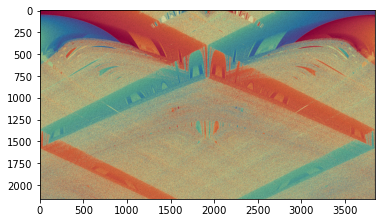

In [2]:
im = np.array(Image.open('lib/images/okmJuRN.jpg'))
print(im.shape)
plt.imshow(im)

In [3]:
sample_mask = np.random.choice([False, True], (im.shape[0], im.shape[1]), p=[0.999, 0.001])
s_im = im[sample_mask].transpose()
s_im.shape

(3, 8401)

<IPython.core.display.Javascript object>


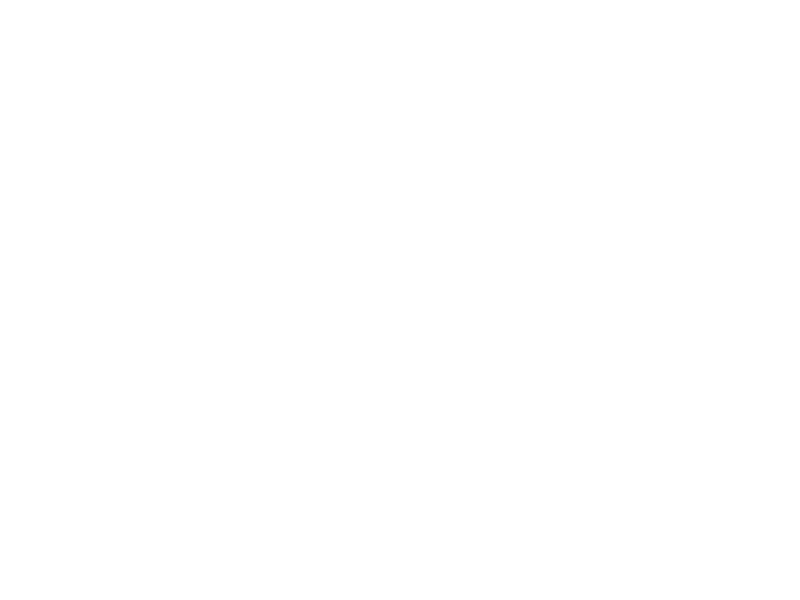

In [4]:
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(s_im[0], s_im[1], s_im[2])

In [5]:
k_means = KMeans().fit(s_im.transpose())

<IPython.core.display.Javascript object>


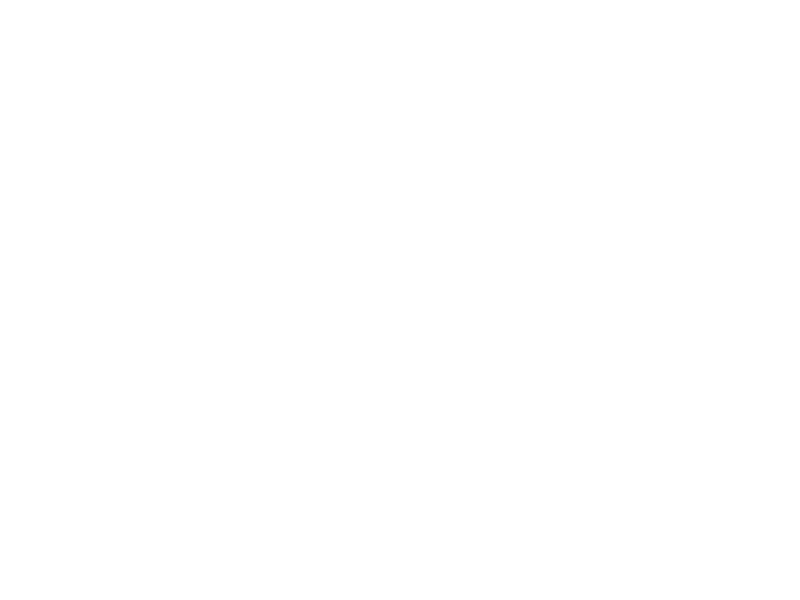

In [6]:
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(s_im[0], s_im[1], s_im[2], c=k_means.labels_)

In [7]:
inertia_list = []
for i in range(1, 21):
    k_means = KMeans(n_clusters=i).fit(s_im.transpose())
    inertia_list.append(k_means.inertia_)
    
print(inertia_list)

[37888302.07308662, 23692229.59873831, 11510978.089125179, 8649414.721551731, 7171592.268131066, 5819799.269478061, 4941966.125098754, 4335055.978826996, 3987407.5140556465, 3668924.8364051217, 3340019.3492754204, 3090105.320606992, 2908850.549422175, 2738684.625118566, 2587386.963494172, 2458629.3840587013, 2336848.5847801375, 2244440.851918432, 2143005.658294374, 2070012.4905501285]


<IPython.core.display.Javascript object>


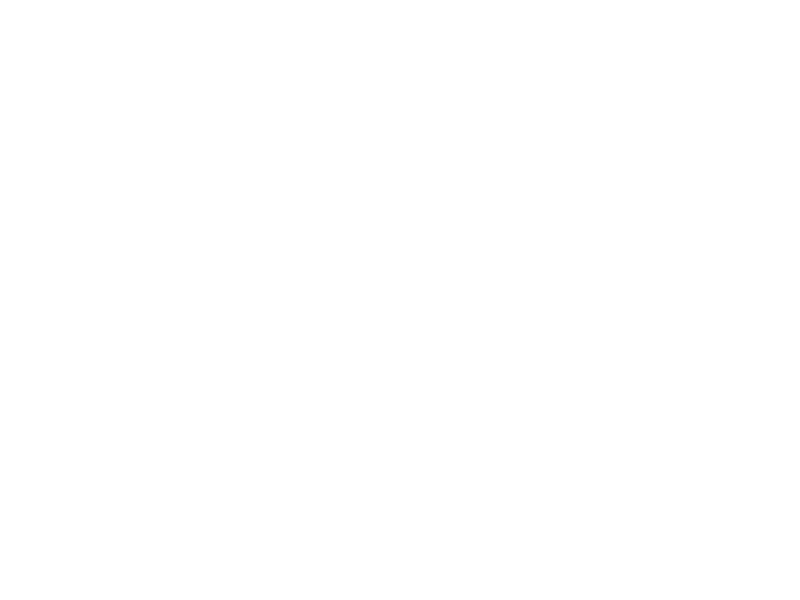

In [8]:
plt.figure()
plt.plot(inertia_list)

In [9]:
s_im_hsl = np.array(rgb2hsl(*s_im))
s_im_hsl.shape

(3, 8401)

<IPython.core.display.Javascript object>


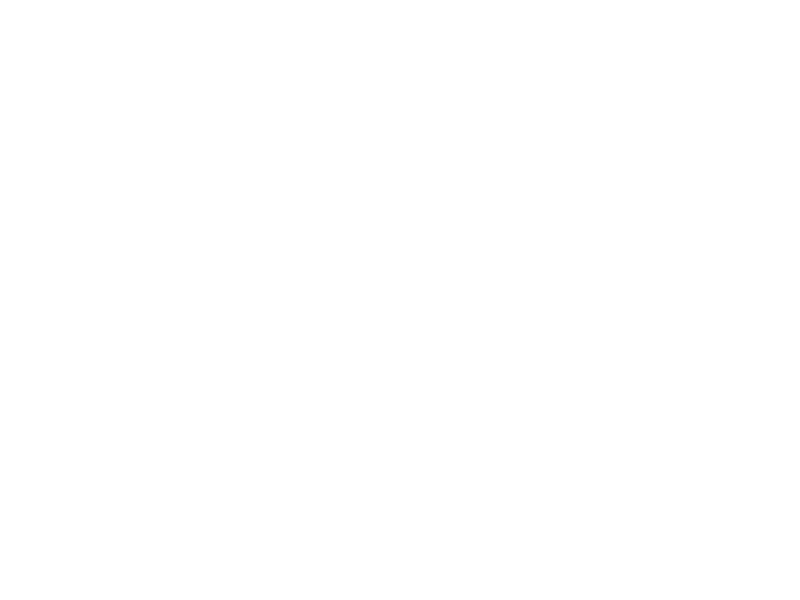

In [10]:
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(s_im_hsl[0], s_im_hsl[1], s_im_hsl[2], c=k_means.labels_)

In [11]:
k_means = KMeans().fit(s_im_hsl.transpose())

<IPython.core.display.Javascript object>


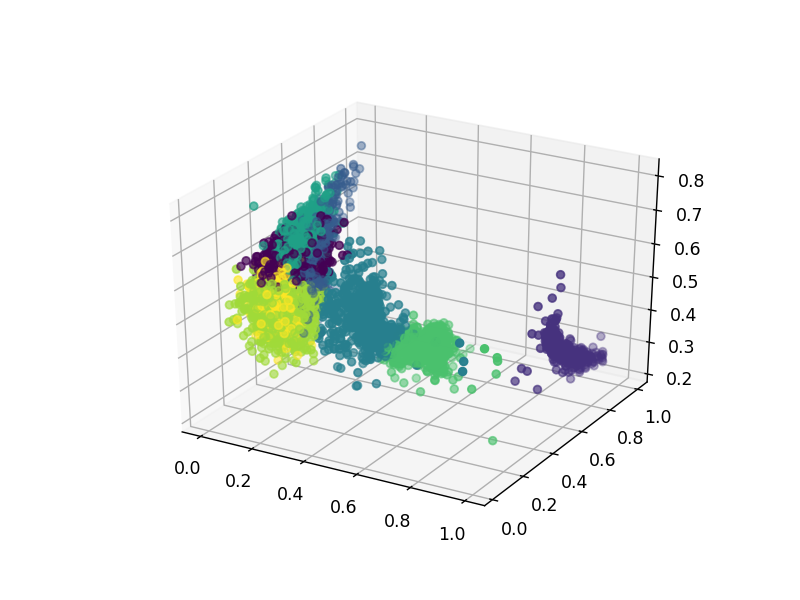

In [12]:
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(s_im_hsl[0], s_im_hsl[1], s_im_hsl[2], c=k_means.labels_)

In [13]:
inertia_list = []
for i in range(1, 21):
    k_means = KMeans(n_clusters=i).fit(s_im_hsl.transpose())
    inertia_list.append(k_means.inertia_)
    
print(inertia_list)

[710.7798908707209, 349.8284221087004, 231.5407286690321, 135.26345782893583, 106.87471794665218, 88.5026372366723, 77.6198734061938, 69.70741379430405, 62.43513760295904, 56.904205662578164, 51.79998900004496, 48.325330567362656, 45.256337768277845, 42.68058762364398, 40.47369494641607, 37.78626577948756, 36.31160007183961, 34.84015538810066, 33.65853756019573, 32.297291344748146]


<IPython.core.display.Javascript object>


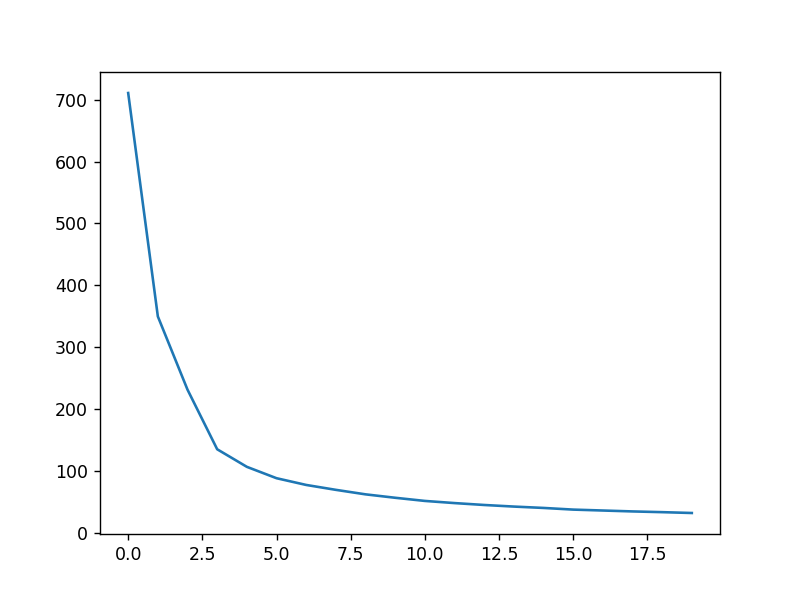

In [14]:
plt.figure()
plt.plot(inertia_list)

In [15]:
k_means = KMeans().fit(s_im_hsl.transpose())
centres = k_means.cluster_centers_
centres

array([[0.16520309, 0.26378698, 0.62262466],
       [0.57768929, 0.4330365 , 0.3920737 ],
       [0.0393662 , 0.5791174 , 0.51557207],
       [0.09908277, 0.30009312, 0.51854239],
       [0.96567563, 0.66748792, 0.38403435],
       [0.45038145, 0.28009432, 0.49729574],
       [0.18131655, 0.16857045, 0.53178818],
       [0.1048193 , 0.41441059, 0.63517899]])

<IPython.core.display.Javascript object>


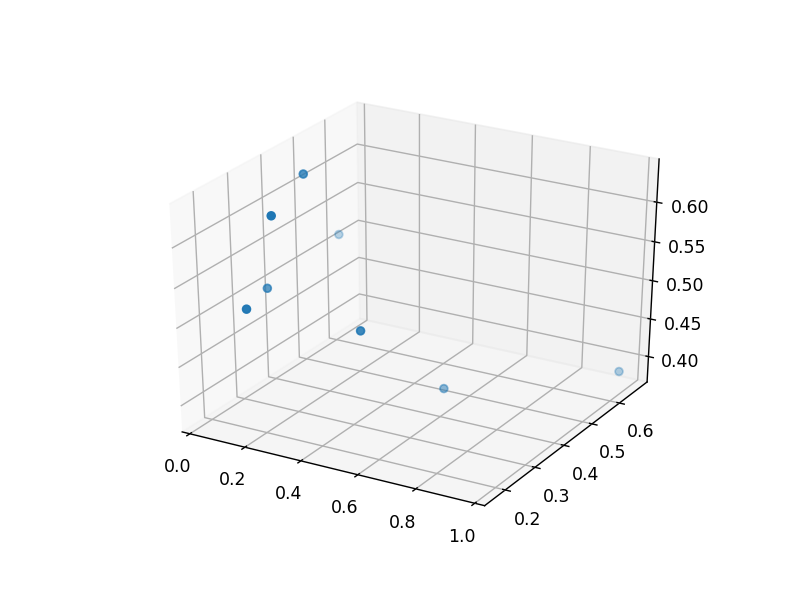

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(*centres.transpose())

In [17]:
pca = PCA().fit(centres)
print(pca.components_)
print(pca.singular_values_)

[[ 0.92719423  0.30150325 -0.22227606]
 [-0.31075206  0.95046512 -0.00701467]
 [ 0.20915069  0.0755767   0.97495854]]
[0.90427935 0.37326977 0.13922091]


In [18]:
origin = np.repeat(np.mean(centres, axis=0)[:, None], 3, axis=1)
vectors = (np.sqrt(pca.singular_values_) * pca.components_.transpose())
vectors

array([[ 0.88170241, -0.18985648,  0.07803897],
       [ 0.28671031,  0.58069434,  0.02819942],
       [-0.21137031, -0.00428567,  0.36377963]])

<IPython.core.display.Javascript object>


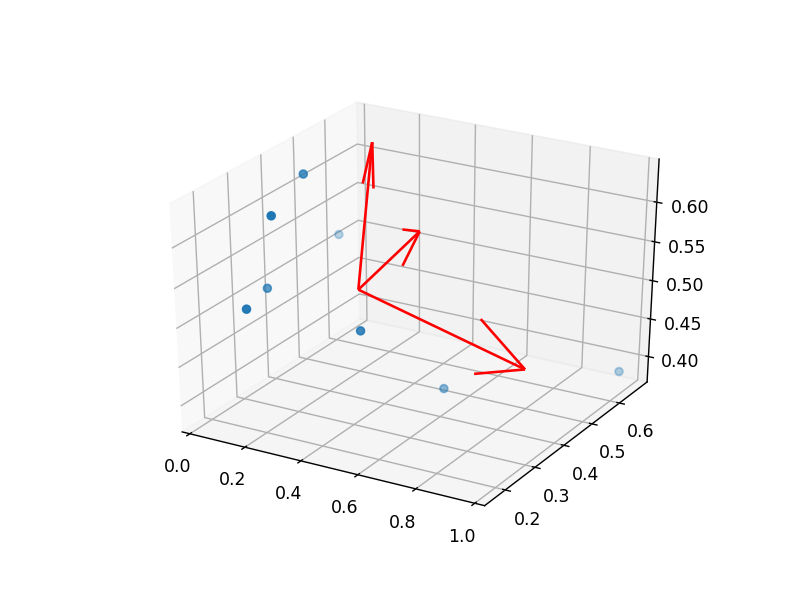

In [19]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.quiver(*origin, *vectors, color='red', length=0.5)
ax.scatter(*centres.transpose())

In [20]:
np.repeat(np.mean(centres, axis=0)[:, None], 3, axis=1)

array([[0.32294178, 0.32294178, 0.32294178],
       [0.38832466, 0.38832466, 0.38832466],
       [0.51213876, 0.51213876, 0.51213876]])

In [21]:
reduced_centres = centres @ vectors[:, 0:2]
reduced_centres.shape

(8, 2)

<IPython.core.display.Javascript object>


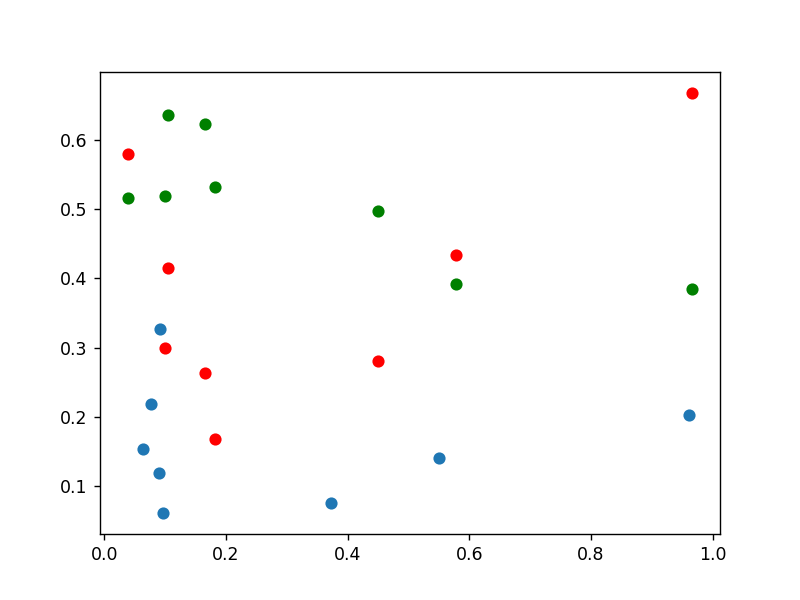

In [22]:
plt.figure()
plt.scatter(*reduced_centres.transpose())
plt.scatter(centres.transpose()[0], centres.transpose()[1], color='red')
plt.scatter(centres.transpose()[0], centres.transpose()[2], color='green')

In [26]:
print(im.shape[0] * im.shape[1])
print(im.size)

8294400
24883200
